# Energy Matrix Heat Map

Here we create an energy matrix heatmap that we use to visualize our lac promoter sequences. This heat map is generated using energy matrix data provided to us by Justin Kinney et al.
<a href="https://www.pnas.org/content/107/20/9158.long">[1]</a>

In [37]:
#import logomaker as lm
#from IPython.display import Image

import numpy as np
import pandas as pd

import holoviews as hv
import holoviews.operation.datashader

import seaborn as sns
import matplotlib.pyplot as plt

First, we load in and trim Kinney's matrix, data in kT units.

In [38]:
# Brewster's energy matrix in kT units
matrix = pd.read_csv("../../data/brewster_matrixS2.txt", header=None, sep = "\s+", comment="#")
matrix.columns = ["A","C","G","T"]
matrix = matrix[5:-6].reset_index(drop=True)

We use seaborn to create the first version of the matrix (18 bp spacer). We use the red to blue diverging color scheme and set the center of the color scheme to 0, denoting squares that do not contribute largely to binding energy in white.

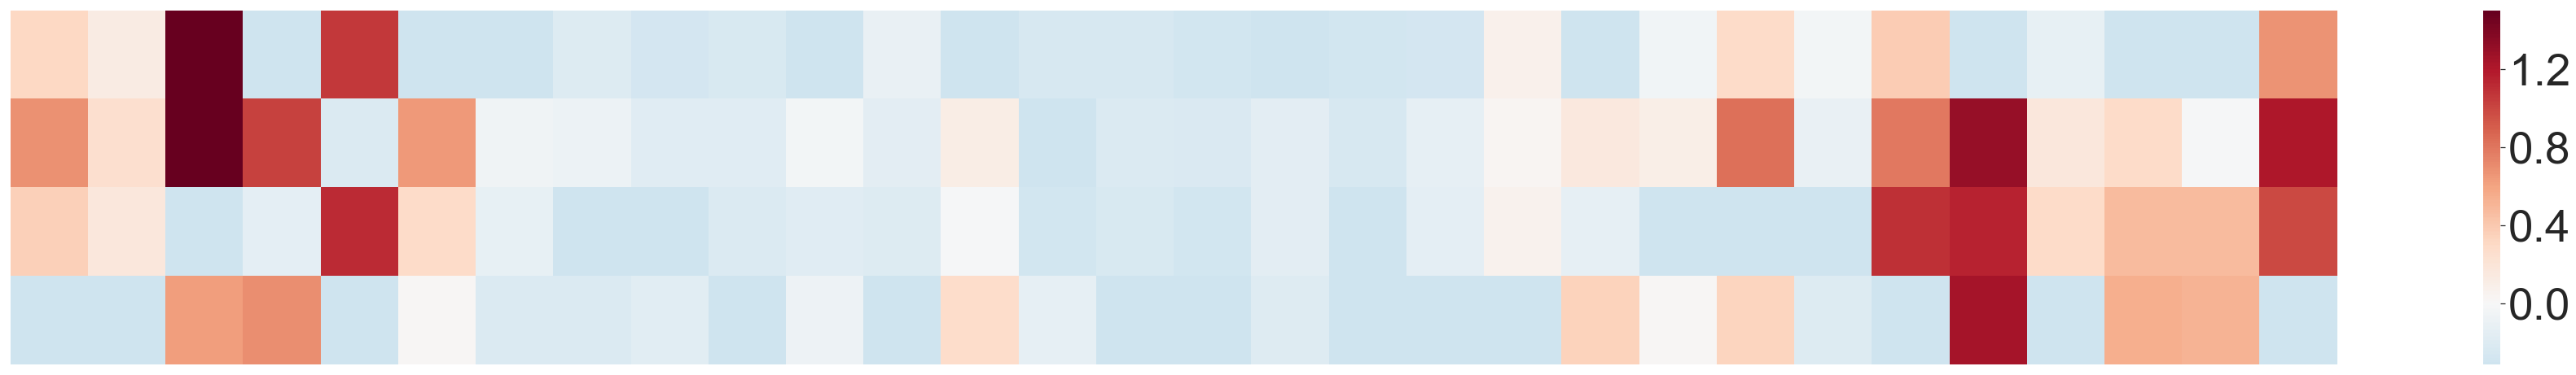

In [39]:
matrix_transposed = matrix.T
plt.figure(figsize=(64, 8))
heat_map = sns.heatmap(matrix_transposed,xticklabels=False, yticklabels=False, cmap="RdBu_r", center=0)

sns.set(font_scale=5)

We played around with different sizes of the matrix by adding or removing rows. Ex. Below, we explored removing the row of the matrix the yields the least difference between each of the four squares.

In [40]:
# determine which row to remove to fit a 17 bp spacer
for i in range(len(matrix)):
    matrix_sorted = matrix.sort_values(by=[i],axis=1,ascending=True)
    print(matrix_sorted.iloc[i,3] - matrix_sorted.iloc[i,0])

0.9950428672316387
0.5608684887005649
1.8141100282485876
1.3456733192090395
1.4330495762711866
0.9688404661016949
0.24850751412429378
0.22297518361581925
0.14568290395480227
0.13337092179138418
0.2706647033898305
0.21173509887005648
0.5880327118644069
0.17811170771186438
0.10226976283333339
0.08696875692090394
0.15180177966101693
0.05793675508474577
0.17838606689265538
0.3898014689265537
0.6534644915254237
0.4180629943502825
1.1384969915254237
0.2712113418079096
1.407385720338983
1.6171179378531073
0.6016558615819209
0.855507556497175
0.831647104519774
1.5276101694915254


As we see above, matrix[17] yields the smallest range between the four spaces in this row. We remove the corresponding row, below, and create a new heat map.

In [41]:
# remove row 17
matrix_17 = matrix[0:17].append(matrix[18:]).reset_index()

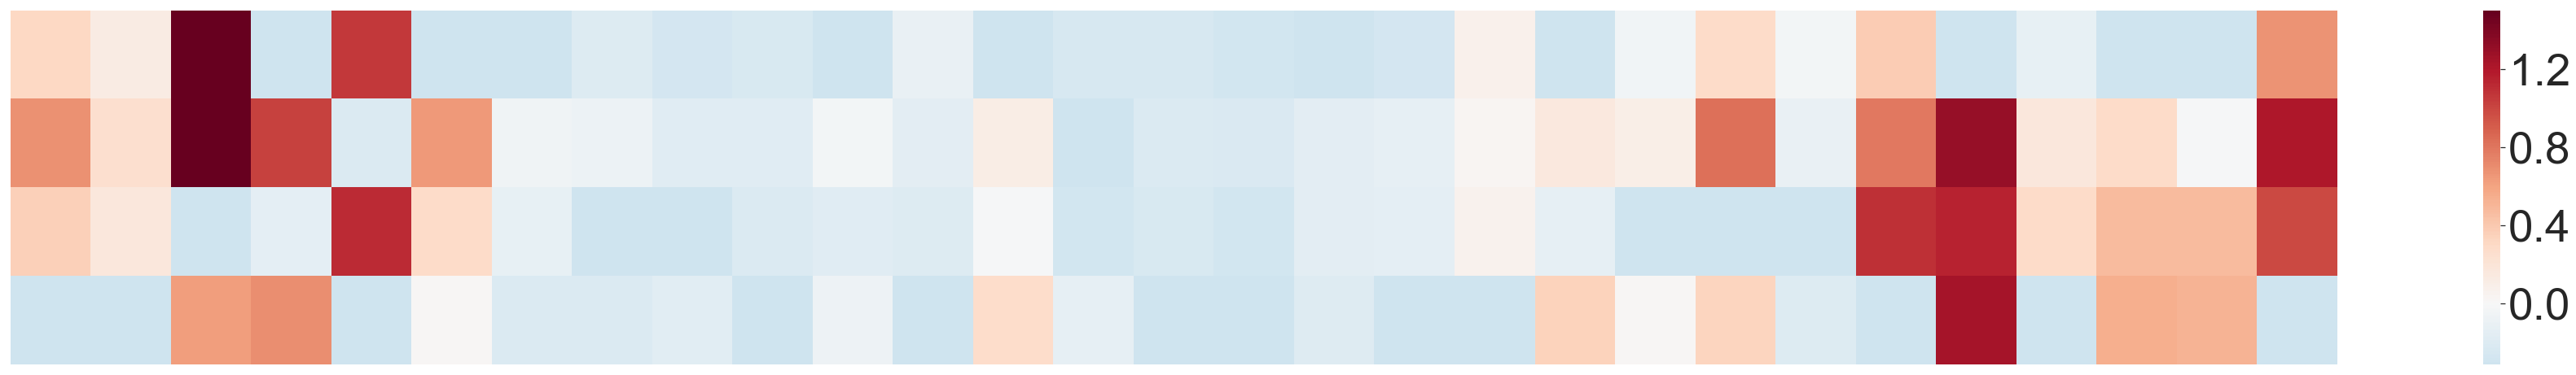

In [42]:
matrix_transposed_17 = matrix_17.T
matrix_transposed_17_trimmed = matrix_transposed_17.drop('index')
plt.figure(figsize=(64, 8))
heat_map = sns.heatmap(matrix_transposed_17_trimmed,xticklabels=False, yticklabels=False, cmap="RdBu_r", center=0)

sns.set(font_scale=5)

The same can be done to add a row of zeros to the matrix.

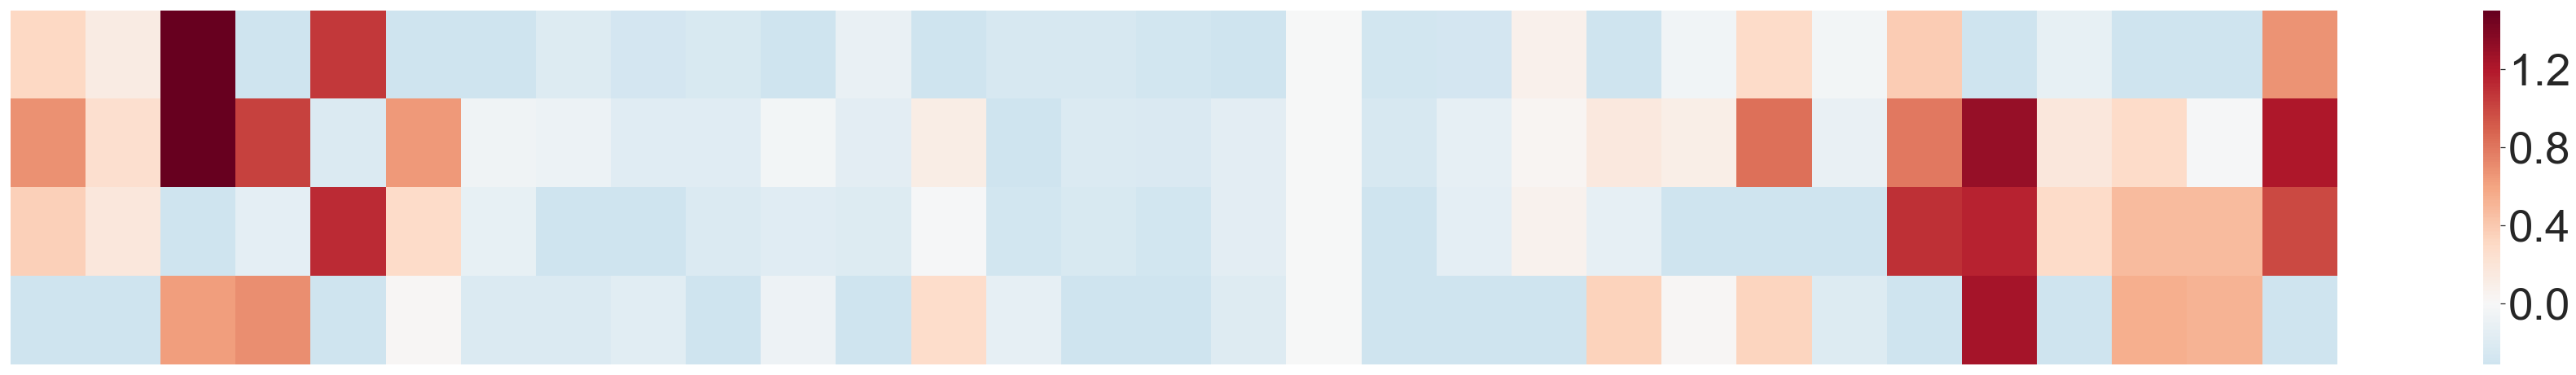

In [43]:
df2 = pd.DataFrame(np.array([[0, 0, 0, 0]]),
                   columns=['A', 'C', 'G', 'T'])
matrix_19 = matrix[0:17].append(df2).append(matrix[17:]).reset_index()

matrix_transposed_19 = matrix_19.T
matrix_transposed_19_trimmed = matrix_transposed_19.drop('index')
plt.figure(figsize=(64, 8))
heat_map = sns.heatmap(matrix_transposed_19_trimmed,xticklabels=False, yticklabels=False, cmap="RdBu_r", center=0)

sns.set(font_scale=5)

# notice the white row at matrix[17].

This next version of the matrix uses Holoviews to plot the same matrix.

In [44]:
matrix['x'] = np.arange(30)
melted = matrix.melt(id_vars='x')
melted.head()

hv.HeatMap(
    data = melted,
    kdims=['x', "variable"],
    vdims="value"
).opts(
    cmap="RdBu_r",
    frame_height=50,
    frame_width=500,
    show_grid=False
)

:HeatMap   [x,variable]   (value)